# 🌸 Practical 1: Flower Classification with a Simple Neural Network (No Activation Functions)

This is **Practical 1** of the **Hands-On Computer Vision Series: A Practical Learning Journey**.

In this notebook, we build and train a very simple neural network **without any activation functions**.
This helps us explore what linear transformations can (and cannot) achieve by themselves.

> 🧠 In the next practical, we’ll introduce non-linear activation functions like ReLU and Softmax to unlock more learning capability.


In this practical, we train a basic image classifier to recognize five types of flowers using a shallow neural network.
The key takeaway is to observe how **linear-only models** behave on a real-world classification task.

We’ll also introduce the dataset pipeline and see what happens when we skip activation functions entirely.

## 📦 Step 1: Setup and Constants

In this first step, we prepare our environment by importing necessary libraries and setting constants that define image properties and labels.

In [3]:
import tensorflow as tf  # Import required library

# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

# Flower class names
CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

We start by importing TensorFlow and defining the shape of the input images and the possible classes (flower types).

## 🖼️ Step 2: Image Reading and Preprocessing

This function handles loading and resizing of each image. We ensure all images are standardized in shape and format so they can be used for training.

In [4]:
def read_and_decode(filename, resize_dims):
    img_bytes = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, resize_dims)
    return img

This function loads an image from a file, decodes it, normalizes pixel values to [0,1], and resizes it to the correct shape.

## 🧾 Step 3: Reading Labels from CSV

Images are labeled in a CSV file. We read each row to get the image file name and flower name, convert the flower name to a number, and load the corresponding image.

In [5]:
def parse_csvline(csv_line):
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    return img, label

This function takes a line from a CSV file, extracts the image path and label name, and converts it to an image tensor and a numerical label.

## 📂 Step 4: Loading the Dataset

We now load and process the full training and evaluation datasets using the functions above. This enables our model to access images and labels in batches efficiently.

In [6]:
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

This creates the training and evaluation datasets by reading image file names and labels from CSVs, preprocessing them, batching them, and setting up prefetching.

## 🔍 Step 5: Display Some Sample Images

Before training, it's important to check that our data is correct. Here, we visualize 16 random training images with their labels to confirm successful loading and labeling.

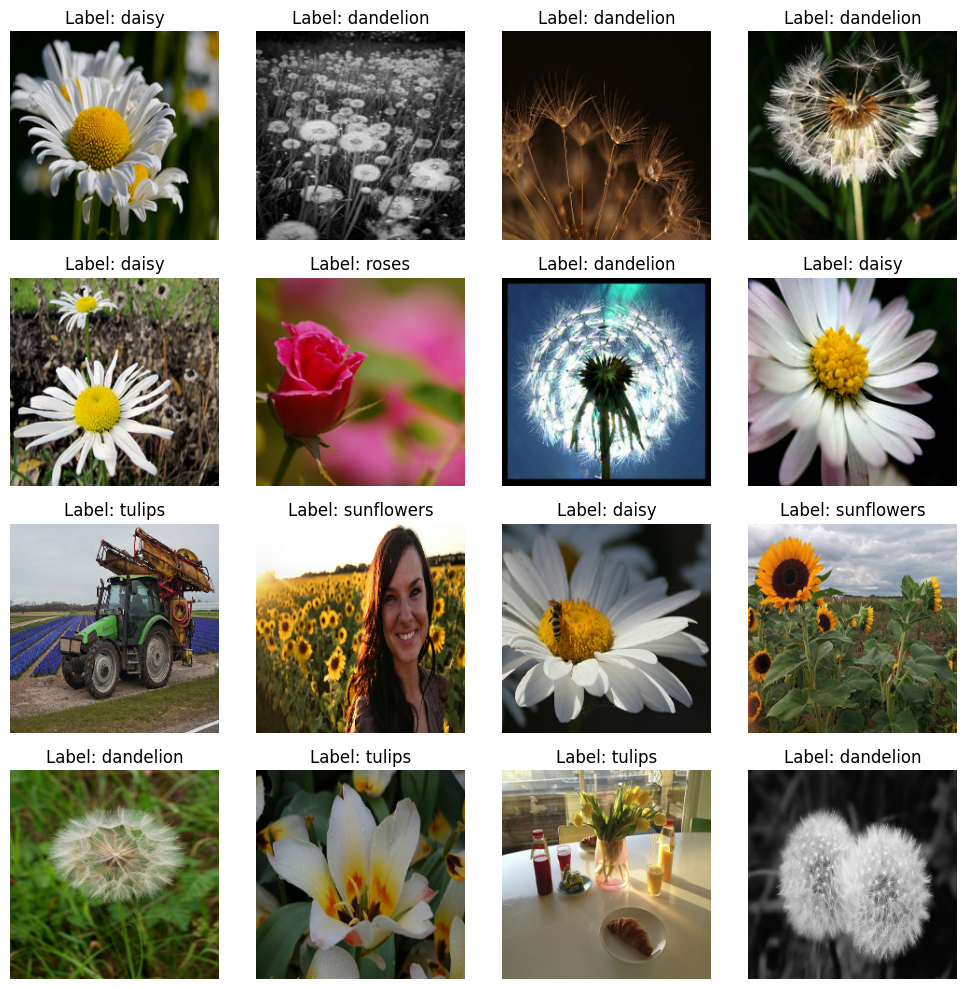

In [7]:
import matplotlib.pyplot as plt  # Import required library

for image_batch, label_batch in train_dataset.take(1):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i in range(16):
        ax = axes[i // 4, i % 4]
        ax.imshow(image_batch[i].numpy())
        ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

This shows a 4x4 grid of sample training images along with their actual labels, so you can visually confirm that everything is correct.

In [8]:
# Build a Simple Neural Network WITHOUT Activation Functions
# This model will not include any activation functions between layers.
# In the next practical, we will add activation functions to explore non-linearity.

from tensorflow import keras

model = keras.Sequential([  # Initialize a sequential model
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(len(CLASS_NAMES), activation="softmax")  # Fully connected layer (linear), no activation function used
])

model.compile(  # Compile the model with optimizer, loss function, and metric
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 🧠 Step 6: Defining the Neural Network Model

We build a basic linear neural network. It's simple but good for getting started. It flattens the image into a 1D array and uses a dense layer with softmax to classify into flower types.

**🧩 Neural Network Architecture:**

Below is a visual representation of the neural network used in this project:

![Neural Network Architecture](images/simple_nn_architecture.png)

This builds a very basic linear model that flattens the image and classifies it using a dense (fully connected) layer.

## 🏃 Step 7: Train the Model

Now we train the model over multiple epochs (passes over the full dataset). We also evaluate it on a validation set to check its accuracy after each epoch.

In [9]:
# Train the model
# This will train the model for several epochs using linear layers only

EPOCHS = 10

history = model.fit(  # Train the model using training dataset
    train_dataset,
    validation_data=eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 250s 1s/step - accuracy: 0.2984 - loss: 16.6419

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.2987 - loss: 16.6184 - val_accuracy: 0.3054 - val_loss: 15.9461
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.4191 - loss: 8.9424 - val_accuracy: 0.3703 - val_loss: 10.2533
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 197s 952ms/step - accuracy: 0.4418 - loss: 9.2613 - val_accuracy: 0.4324 - val_loss: 10.8719
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 147s 709ms/step - accuracy: 0.4916 - loss: 8.3353 - val_accuracy: 0.4649 - val_loss: 9.7886
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 140s 677ms/step - accuracy: 0.4822 - loss: 11.1749 - val_accuracy: 0.4081 - val_loss: 13.1401
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 141s 675ms/step - accuracy: 0.5171 - loss: 9.8303 - val_accuracy: 0.4162 - val_loss: 16.2828
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 128s 610ms/step - accuracy: 0.5294 - loss: 9.4080 - val_accuracy: 0.4378 - val_loss: 14.8661
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 142s 608ms/step - accuracy: 0.5627 - loss: 9.

We train the model using the training dataset and validate it on the evaluation dataset, tracking accuracy and loss.

## 📈 Step 8: Visualize Training Progress

Here we visualize the training history — both the loss (how wrong the model is) and the accuracy (how right it is). This helps identify overfitting or underfitting.

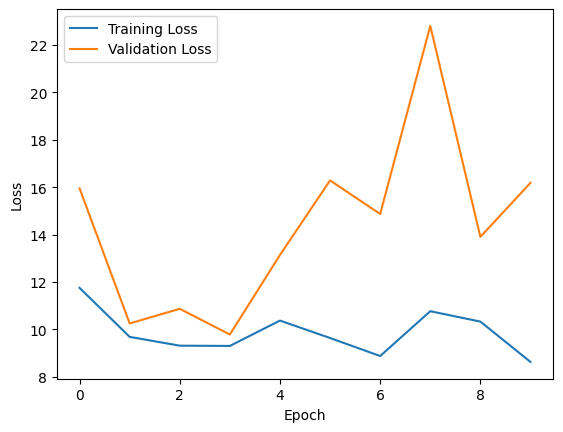

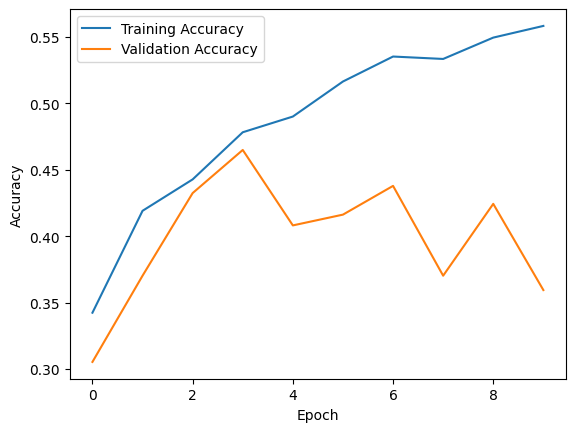

In [10]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 📉 Model Performance Analysis
The figure below shows how the model performed during training and validation across 10 epochs.

### 📊 Top Plot: Loss Curves
- **Training Loss** steadily decreases, showing the model is fitting the training data.
- **Validation Loss** fluctuates and increases significantly after a few epochs, indicating **overfitting**.

### ✅ Bottom Plot: Accuracy Curves
- **Training Accuracy** improves steadily, reaching ~56%.
- **Validation Accuracy** plateaus and even drops - the model fails to generalize.

### ⚠️ Why This Happens:
- The network has no activation functions → it behaves like a linear classifier.
- Linear models can't capture complex patterns in image data.
- Hence, the model learns on training data but performs poorly on new data.

👉 This sets the stage for **Practical 2**, where we introduce **activation functions** to help the model learn **non-linear relationships**.

## 🔮 Step 9: Show Predictions vs Actual Labels

To evaluate model performance intuitively, we show predicted vs. actual labels for a batch of evaluation images. This visual check is great for spotting common misclassifications.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


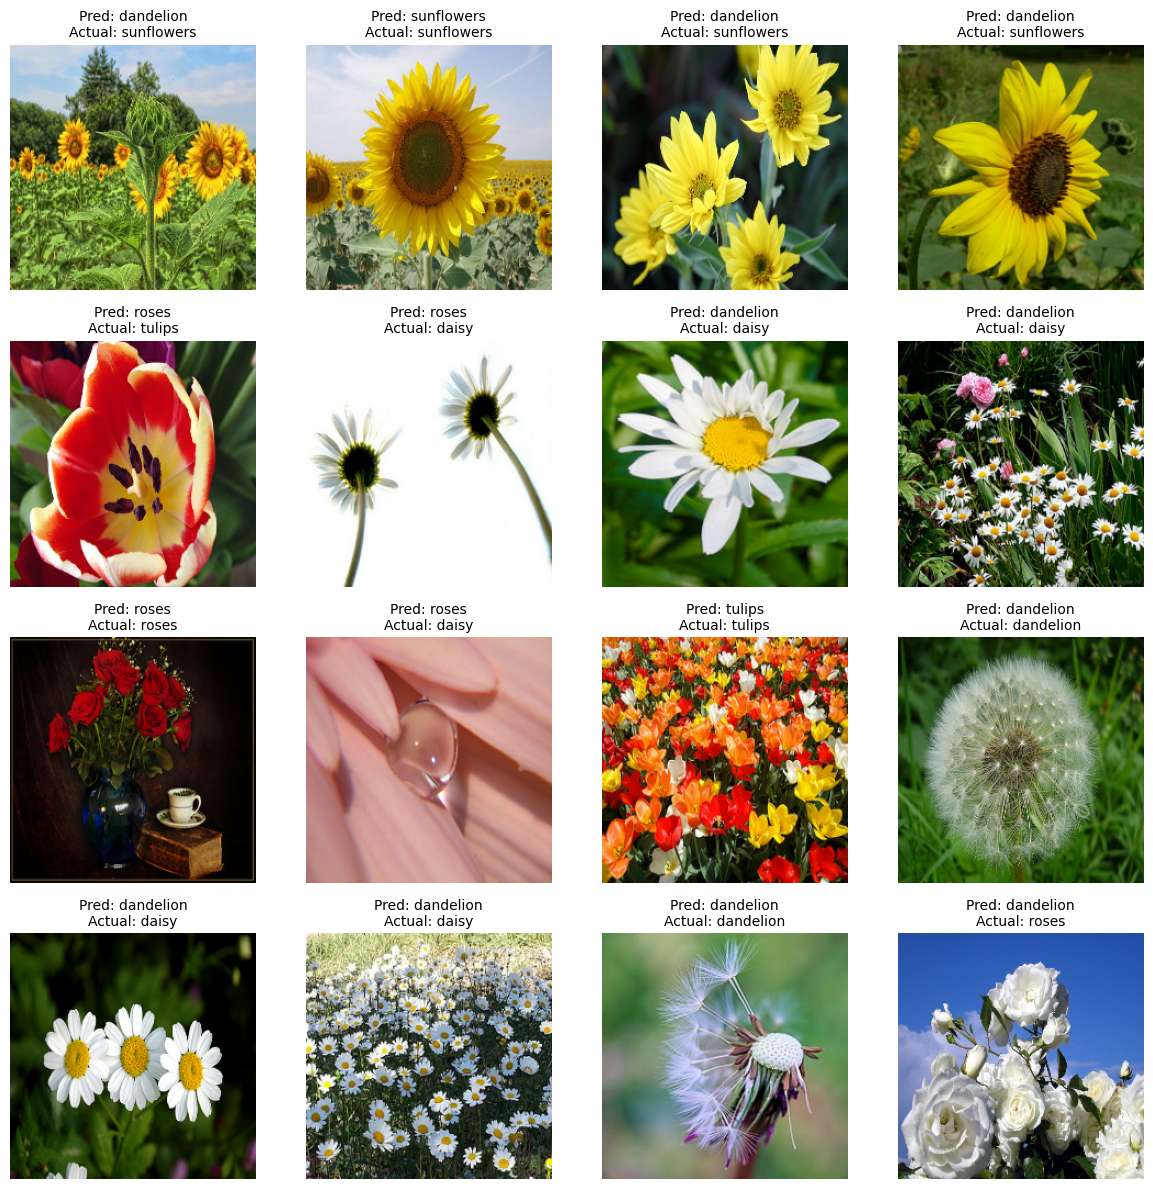

In [11]:
import numpy as np  # Import required library
import math  # Import required library

for images, labels in eval_dataset.take(1):
    batch_predictions = model.predict(images)
    predicted_indices = np.argmax(batch_predictions, axis=1)

    num_images = images.shape[0]
    num_cols = 4
    num_rows = math.ceil(num_images / num_cols)

    plt.figure(figsize=(12, 3 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')
        pred_class = CLASS_NAMES[predicted_indices[i]]
        actual_class = CLASS_NAMES[labels[i].numpy()]
        plt.title(f"Pred: {pred_class}\nActual: {actual_class}", fontsize=10)
    plt.tight_layout()
    plt.show()

This shows model predictions alongside the real labels for a batch of test images.

## ✅ Conclusion

This notebook demonstrates a complete pipeline for training a basic image classifier on flower images using TensorFlow and Keras. Although this model is very simple (linear), it provides a great foundation for experimenting with deeper architectures like CNNs (Convolutional Neural Networks).

Congratulations! You've completed one of the first practical milestones in the Computer Vision roadmap. You're now ready to move on to deeper architectures like Convolutional Neural Networks (CNNs).

## ✅ Summary and What’s Next
- In this practical, we used a **fully connected neural network without activation functions**.
- This means the model is limited to learning **linear decision boundaries**.

➡️ In the next hands-on notebook, we will introduce **activation functions** like ReLU to improve the model's ability to learn complex patterns in image data.

Stay tuned for **Practical 2: Adding Non-Linearity with Activation Functions**!

---

📌 This practical was designed and written by **Dr. Zaid Al-Huda** to offer hands-on intuition for how neural networks learn from image data.